In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

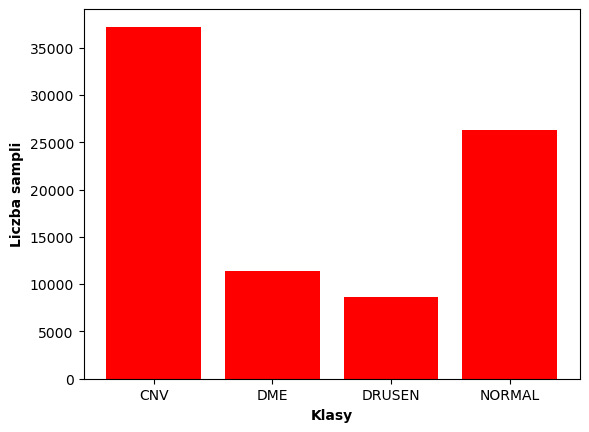

In [14]:
path = "../OCT2017"
n_dict = {}
CNV = []
DME = []
DRUSEN = []
NORMAL = []
labels = []
for i in os.listdir(path):
    if '.' not in i:
        n_dict[i] = {}
        labels.append(i)
        for j in os.listdir('/'.join([path, i])):
            if '.' not in j:
                list = os.listdir('/'.join([path, i, j]))
                new_list = [x for x in list if '.D' not in x]
                n_dict[i].update({j: len(new_list)})
                if j == "CNV":
                    CNV.append(len(new_list))
                elif j == "DME":
                    DME.append(len(new_list))
                elif j=="DRUSEN":
                    DRUSEN.append(len(new_list))
                else:
                    NORMAL.append(len(new_list))

fig = plt.figure()
plt.bar(np.arange(4), n_dict['train'].values(), color='r')
plt.xticks([0,1,2,3], n_dict['train'].keys())
plt.ylabel("Liczba sampli", fontweight ='bold')
plt.xlabel("Klasy", fontweight ='bold')
plt.show()